## AI5100 Assignment-1 , CS21BTECH11055 , SADINENI ABHINAY

## Question-1
Perceptron learning algorithm

Step-1: Dataset Creation \
For Linearly Separble dataset We choose line(2D)/ hyperplane(>2D) then we can make points based on then separation gamma 
Steps:
1. Create centres of gaussian distribution and add gamma distance
2. Generate the two classes based on the locsations of the centers
3. Shuffle the classes


In [1]:
import numpy as np
import  matplotlib.pyplot as plt
np.random.seed(42)


In [2]:
def generate_dataset(gamma,c1,c2,n1,n2):
    C1 = np.random.normal(loc=c1,scale=1,size=(n1,2))
    C2 = np.random.normal(loc=c2+gamma*(c2-c1)/np.linalg.norm(c2-c1),scale=1,size=(n2,2))

    y1 = np.full((n1,1),fill_value=-1)
    y2 = np.full((n2,1),fill_value=1)

    X  = np.concatenate((C1,C2),axis=0)
    y  = np.concatenate((y1,y2),axis=0) 

    indices = np.arange(n1+n2)
    np.random.shuffle(indices)
    
    return X[indices], y[indices]


Plot functions(Reusable)

In [3]:
def plot_dataset(X, y):
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y[:, 0], s=30)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [4]:
def plot_dataset_with_boundary_plt(X,y,W,gamma,k,plt):
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y[:, 0], s=20)
    x_1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x_2 = -(W[1] * x_1 + W[0]) / W[2]
    plt.plot(x_1, x_2, label=f'Decision Boundary (gamma={gamma},iter={k})', color='r')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    return plt

In [5]:
def plot_dataset_with_boundary_ax(X,y,W,gamma,k,ax):
    ax.scatter(X[:, 0], X[:, 1], marker="o", c=y[:, 0], s=20)
    x_1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x_2 = -(W[1] * x_1 + W[0]) / W[2]
    ax.plot(x_1, x_2, label=f'Decision Boundary (gamma={gamma},iter={k})', color='r')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    return ax

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


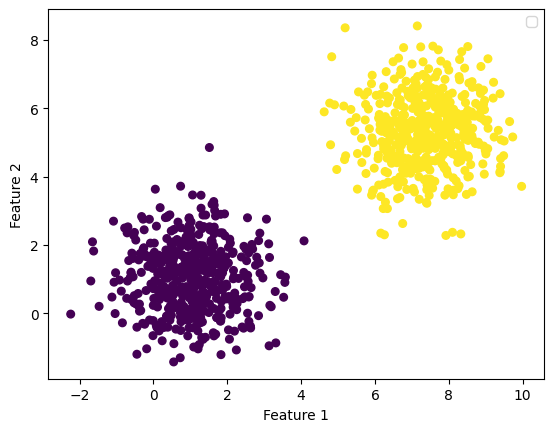

In [6]:
X , y = generate_dataset(4, np.array([1, 1]), np.array([4, 3]), 500, 500)
plot_dataset(X,y)

Step 2:Percepton Algorithm

In [7]:
import numpy as np

def percepton(X, y, W, max_epochs):
    X = np.column_stack([np.ones(X.shape[0]),X])
    for epoch in range(max_epochs):
        miss_classify = 0
        for i in range(X.shape[0]):
             # check whether the datapoint is missclassfied or not
            if np.dot(X[i],W) * y[i] <= 0:
                W = W + X[i].reshape(-1, 1) * y[i]
                miss_classify += 1
         # if perfect classification then break out and return       
        if miss_classify == 0:
            return W, epoch+1
    return W, epoch+1

In [8]:
W = np.zeros((X.shape[1]+1, 1))
W, k = percepton(X, y, W, 100)
print('No of iterations:' ,k)
print('Weights :',W)

No of iterations: 2
Weights : [[-16.        ]
 [  3.11263   ]
 [  1.00855378]]


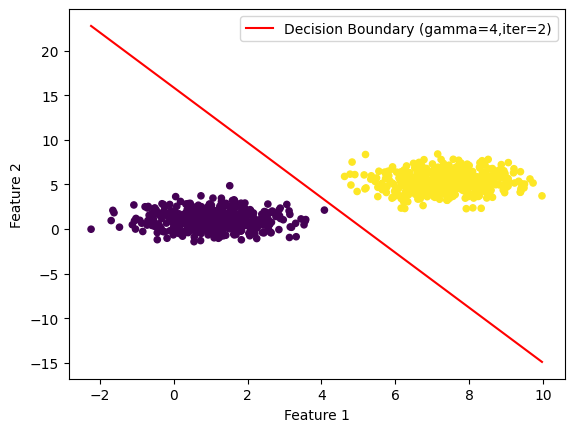

In [9]:
plot_dataset_with_boundary_plt(X,y,W,4,k,plt)
plt.show()

**Step 3: Variation**

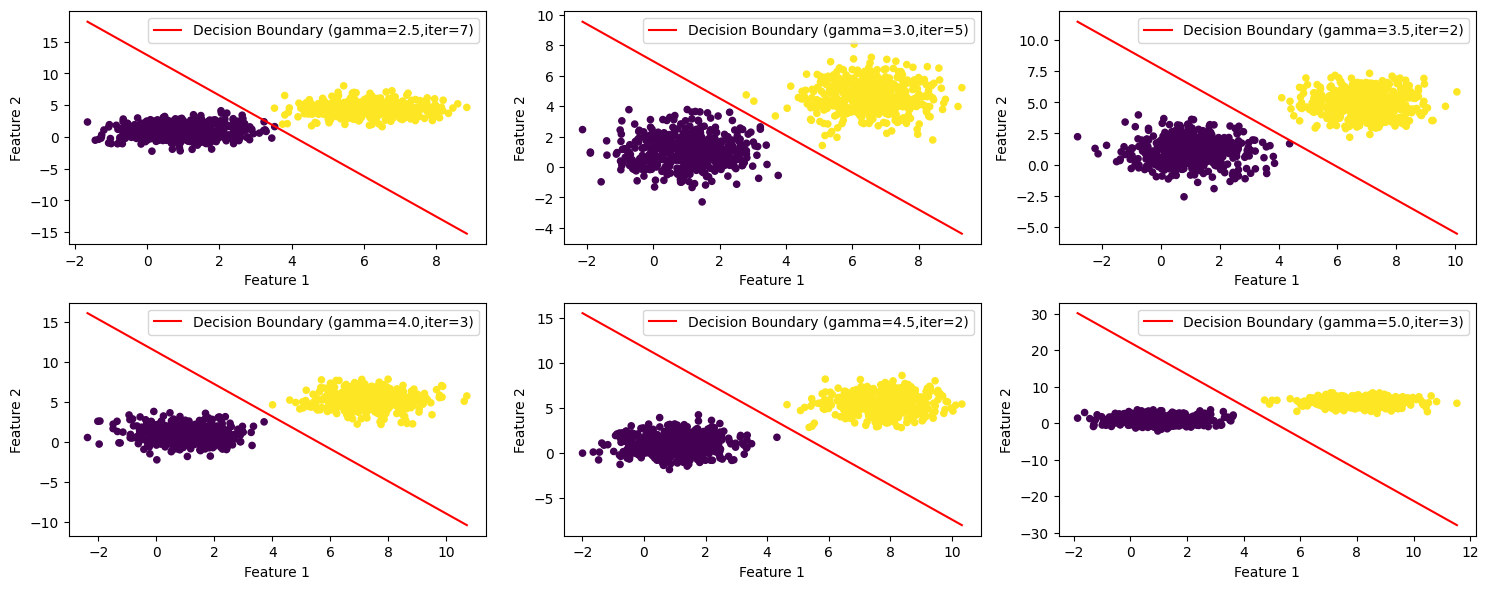

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
        gamma = 2.5 + i * 0.5
        X, y = generate_dataset(gamma, np.array([1, 1]), np.array([4, 3]), 500, 500)
        W = np.zeros((X.shape[1] + 1, 1))
        W, k = percepton(X, y, W, 1000)
        plot_dataset_with_boundary_ax(X, y, W, gamma, k, ax)
plt.tight_layout()
plt.show()


**Step 4:Analysis**
1. As seen in the above visulization when gamma is 2 the dataset is not linearly separable So the algorithm hitted the max number of iterations
2. from gamma above 4 the datasets are linearly separable so the percepton was able to find a boundary that separates the classes 
3. Average k is (5+2+3+2+3)/5 = 2.4  computed before assignment submission values will change from time to time
4. As gamma increase no of iterations decrease and stagnates at 2 since data classes are far apart









## Question 2
Gradient Descent Algorithm
Step1: Gradient Formula(BCE Loss)
**Formulation**
\begin{align*}
    \text{BCE Loss} &= -y \cdot \log(y_{\text{pred}}) - (1 - y) \cdot \log(1 - y_{\text{pred}}) \\
    y_{\text{pred}} &= \sigma (z)  \\
     z &= W^Tx + b \\
    \frac{dBCE}{dW} &= \left(\frac{dBCE}{dy_{\text{pred}}} \cdot \frac{dy_{\text{pred}}}{dz}\right) \cdot \frac{dz}{dW} \\
\end{align*}

Respective derivatives:
\begin{align*}
    \frac{dBCE}{dy_{\text{pred}}} &= \frac{y_{\text{pred}} - y} {y_{\text{pred}} \cdot (1 - y_{\text{pred}})} \\
    \frac{dy_{\text{pred}}}{dz} &= y_{\text{pred}} \cdot (1 - y_{\text{pred}}) \quad  \\
    \frac{dz}{dW} &= x \quad
\end{align*}

Combining these, we get:

\begin{align*}
    \frac{dBCE}{dW} &= \frac{y_{\text{pred}} - y}{y_{\text{pred}} \cdot (1 - y_{\text{pred}})} \cdot y_{\text{pred}} \cdot (1 - y_{\text{pred}}) \cdot x
\end{align*}

Simplifying further:

\begin{align*}
    \frac{dBCE}{dW} &= (y_{\text{pred}} - y) \cdot x
\end{align*}



In [11]:
def gradient(W,x,y):
    # sigmod neuron z = w^T.x + b
    # output = sigmod(z) 
    z = np.dot(x,W)
    y_predicted = 1/(1+np.exp(-z))
    y = 1 if y == 1 else 0
    
    # Gradient( dBCE/ dW ) =  ( y_predicted - y)*x 
    return (y_predicted - y)*x

Step 2: Gradient Descent Algorithm

In [12]:
def gradient_descent(X, y, W, max_epochs, alpha):
    X = np.column_stack([np.ones(X.shape[0]),X])
    for epoch in range(max_epochs):
        miss_classify = 0
        for i in range(X.shape[0]):
            # check whether the datapoint is missclassfied or not
            if  np.dot(X[i], W) * y[i] <= 0:
                gradient_value =  gradient(W,X[i],y[i])
                W = W - alpha*gradient_value.reshape(-1, 1)
                miss_classify += 1
        # if no missclassification then break out add return the weights       
        if miss_classify == 0:
            return W, epoch+1
    return W, epoch+1

Step 3: Train the model and get the boundary

In [13]:
W = np.zeros((X.shape[1]+1, 1))
W, k = gradient_descent(X, y, W, 100,0.25)
print('No of iterations:' ,k)
print('Weights :',W)


No of iterations: 2
Weights : [[-2.44812417]
 [ 0.32487722]
 [ 0.38429436]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


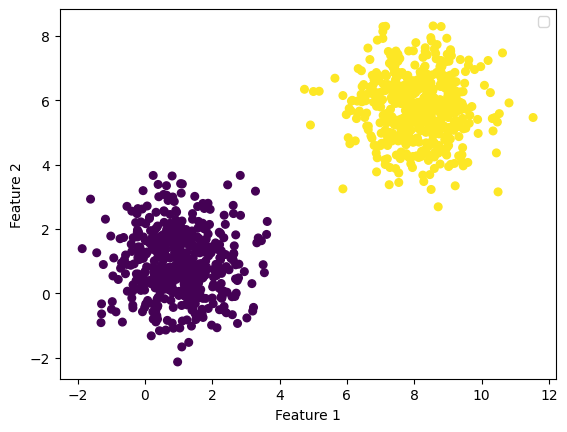

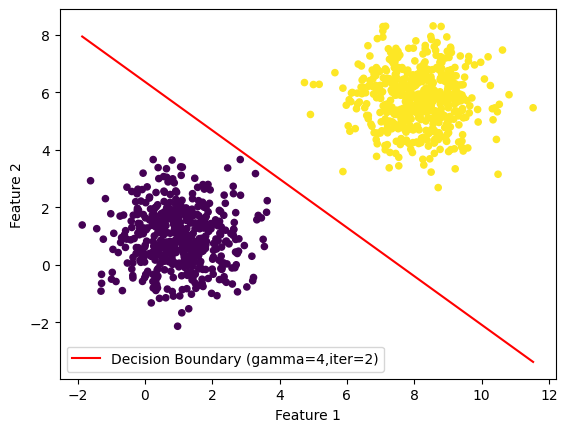

In [14]:
plot_dataset(X,y)
plot_dataset_with_boundary_plt(X,y,W,4,k,plt)
plt.show()

## Question 3 :
  MLP with single hidden Layer

Step1 : Dataset Creation (Nor Linearly seperable)  \

I choose the concentric circle dataset So i am generating dataset using paramteric form of circle
1. paramtric form of circles (c1+r*cos(theta) , c2+r\*sin(theta))
2. if r has normal distribution then it will have spread


In [15]:
def generate_concentric_circles(centre , r1 , r2 ,n1 , n2 , std):

    # paramtric form of circles (c1+r*cos(theta) , c2+r*sin(theta))
    # if r has normal distribution then it will have spread 
    theta1 = 2*np.pi*np.random.rand(n1)
    spread1= np.random.normal(loc=r1,scale=std,size=n1) 
    C1 = np.full((n1,2),fill_value=centre) + np.column_stack([spread1*np.cos(theta1),spread1*np.sin(theta1)])
    y1 =np.zeros((n1,1))


    theta2 = 2*np.pi*np.random.rand(n2)
    spread2= np.random.normal(loc=r2,scale=std,size=n2) 
    C2 = np.full((n2,2),fill_value=centre) + np.column_stack([spread2*np.cos(theta2),spread2*np.sin(theta2)])
    y2 =np.ones((n2,1))

    # shuffle the classes 
    X  = np.concatenate((C1,C2),axis=0)
    y  = np.concatenate((y1,y2),axis=0) 

    indices = np.arange(n1+n2)
    np.random.shuffle(indices)
    
    return X[indices], y[indices]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


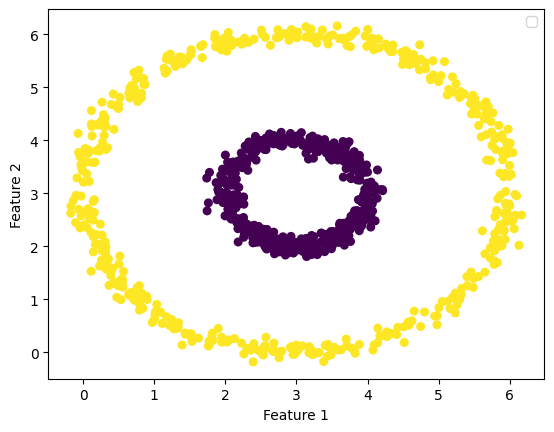

In [16]:
X ,y = generate_concentric_circles(np.array([3,3]) , 1 , 3 , 500 ,500 , 0.1 )
plot_dataset(X,y)
plt.show()

Step 2 & 3 : MLP definition , Back propagation \
For MLP here we have one input layer(two values (x1,x2)) , one hidden layer(n neurons customizable) , one output layer(single neuron)


1. For back propagation we are using BCE loss
2. For activation function we are using sigmod function

In [17]:
class MLP:
    def __init__ (self ,W1 ,b1 ,W2 ,b2):
        self.W1=W1
        self.b1=b1
        self.W2=W2
        self.b2=b2

    # sigmod function
    def sigmoid(self,x):
       return 1 / (1 + np.exp(-x))
    
    # forward function to get result
    def forward(self,X):
        X = X.reshape(W1.shape[1],1)
        s1 = np.dot(self.W1,X) + self.b1
        a1 = self.sigmoid(s1)
        a1 = a1.reshape(W2.shape[1],1)
        s2 = np.dot(self.W2,a1) + self.b2
        a2 = self.sigmoid(s2)
        return  a1, a2        

    # dL/da2 
    def BCE_Derivative_a2 (self,y_label,y_pred):
        N = (y_pred - y_label)
        D = (y_pred*(1-y_pred))
        return N/D 

    # derivative of sigmod with wrt to input
    def sigmod_derivative (self,x):
        return np.multiply(self.sigmoid(x),1-self.sigmoid(x))

    # final prediction 
    def get_prediction(self , y_sig):
        if y_sig < 0.5 :
           return 0
        else :
           return 1   

    # back propagation
    def backpropagation(self,X,y,max_epochs,alpha):
        for epoch in range(max_epochs):
            miss_classification = 0 
            for i in range(X.shape[0]):
                
                # pass the features and get the ouputs
                a0 = X[i].reshape(W1.shape[1],1)
                a1 , a2 = self.forward(X[i])
 
                # count the miss classifications
                if self.get_prediction(a2) == y[i] : 
                    continue
                else:
                    miss_classification += 1

                   
                # compute gradiant for a2 based on BCE loss an delta's are dL/da
                gradient_a2 = self.BCE_Derivative_a2(y[i],a2)
                delta_2  = np.multiply(gradient_a2 ,self.sigmod_derivative(a2))
                delta_1  = np.multiply(np.dot(self.W2.T,delta_2) , self.sigmod_derivative(a1))

                # compute changes for weights and biases and update them simultaneously
                self.W2 = self.W2 - alpha* np.dot(delta_2, a1.T)
                self.b2 = self.b2 - alpha* delta_2
                self.W1 = self.W1 - alpha* np.dot(delta_1, a0.T)
                self.b1 = self.b1 - alpha* delta_1

                break 
            
            if miss_classification == 0:
                print('algorithm stopped')
                break     
        y_pred = [ ]
        for i in range(X.shape[0]):
            a1 , a2 = self.forward(X[i])
            y_pred.append(self.get_prediction(a2))
        y_pred = np.vstack(y_pred)    

        return W2 , b2 , W1 , b1 ,  epoch  , y_pred     

In [18]:
#let us take 5 neurons in the hidden layer
# for general purpose
n = 5
W1 = np.zeros((5,2))
b1 = np.zeros((5,1))
W2 = np.zeros((1,5))
b2 = np.zeros((1,1))

model = MLP(W1,b1,W2,b2)
X ,y = generate_concentric_circles(np.array([3,3]) , 1 , 3 , 500 ,500 , 0.1 )
W2 , b2 , W1 , b1 ,epoch , y_pred = model.backpropagation(X,y,100,0.02)

k = np.sum(y_pred == y)
print('Training accuracy: ',k/len(y)*100,'%')
print( 'iterations: ',epoch)



Training accuracy:  50.0 %
iterations:  99


**Step 4:Analysis** 

for : \
Training accuracy:  50.0 % \
learning rate = 0.02 \
iterations:  99 


for : \
Training accuracy:  63.7 % \
learning rate =0.05 \
iterations:  299999 
 
 
for : \
Training accuracy:  65.7 % \
learning rate =0.05 \
iterations:  499999 

Observations:
1. Here our dataset is somewhat has complex  distribution
2. There might be better loss function where the Network will convergent at faster rate.
3. Optimization can be done for the learning rate and intial weights



